# Bibliometrics 📖

### ✅ Descarcar la información en archivos bibtext




In [1]:
%matplotlib inline

In [1]:
import heapq
import re
import time
import matplotlib.pyplot as plt
from sortedcontainers import SortedList
import numpy as np

# Algoritmos de ordenamiento
def tim_sort(arr):
    return sorted(arr)

def comb_sort(arr):
    gap = len(arr)
    shrink = 1.3
    sorted_flag = False

    while not sorted_flag:
        gap = int(gap / shrink)
        if gap <= 1:
            gap = 1
            sorted_flag = True

        for i in range(len(arr) - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                sorted_flag = False
    return arr

def selection_sort(arr):
    arr = arr[:]
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def tree_sort(arr):
    return list(SortedList(arr))

def bucket_sort(arr):
    if len(arr) == 0:
        return arr

    max_val = max(arr)
    min_val = min(arr)
    bucket_range = (max_val - min_val) / len(arr) + 1
    buckets = [[] for _ in range(len(arr))]

    for num in arr:
        index = int((num - min_val) / bucket_range)
        buckets[index].append(num)

    result = []
    for bucket in buckets:
        result.extend(sorted(bucket))

    return result

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def heap_sort(arr):
    arr = arr[:]
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

def medir_tiempo(algoritmo, datos):
    inicio = time.time()
    algoritmo(datos)
    fin = time.time()
    return (fin - inicio) * 1000  # Convertimos de segundos a milisegundos


# Función para extraer datos del archivo .bib
def extraer_datos(archivo):
    with open(archivo, 'r', encoding='utf-8') as f:
        contenido = f.read()

    años = re.findall(r'year = \{(\d{4})\}', contenido)
    títulos = re.findall(r'title = \{(.+?)\}', contenido)
    dois = re.findall(r'doi = \{(.+?)\}', contenido)

    años = list(map(int, años))  # Convertir años a enteros
    return años, títulos, dois

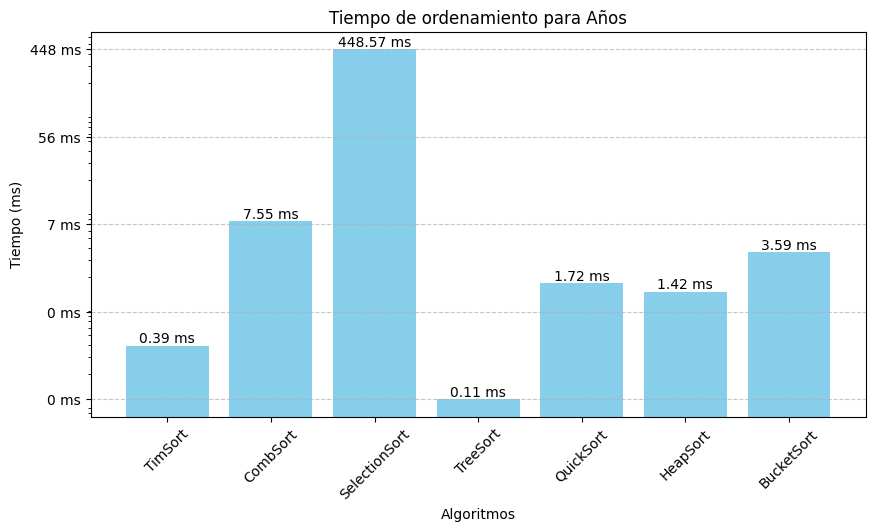

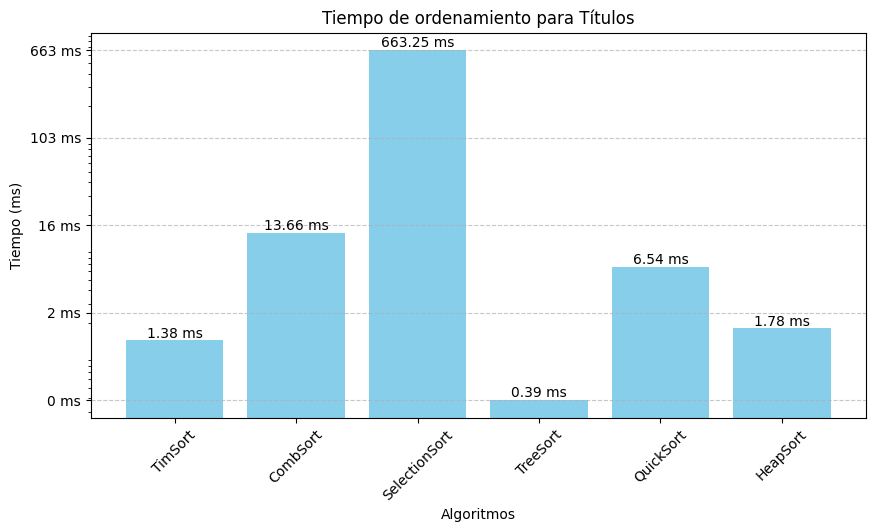

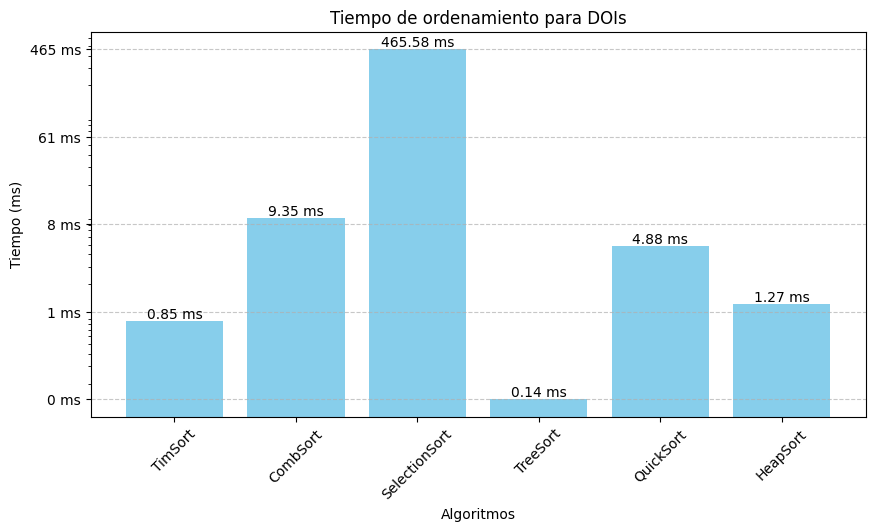

In [2]:
archivo_bib = "./output/unified_cleaned.bib"  # Cambia esto con el nombre real de tu archivo
años, títulos, dois = extraer_datos(archivo_bib)

variables = {
    "Años": años,       # Números
    "Títulos": títulos, # Strings
    "DOIs": dois        # Strings
}

algoritmos = {
    "TimSort": tim_sort,
    "CombSort": comb_sort,
    "SelectionSort": selection_sort,
    "TreeSort": tree_sort,
    "QuickSort": quick_sort,
    "HeapSort": heap_sort
}

# Solo agregar BucketSort si los datos son numéricos
if all(isinstance(x, int) for x in años):
    algoritmos["BucketSort"] = bucket_sort

resultados = {}

for nombre_var, datos in variables.items():
    resultados[nombre_var] = {}

    # Excluir BucketSort si la variable no es numérica
    algoritmos_filtrados = algoritmos.copy()
    if nombre_var != "Años":  # Solo dejar BucketSort para "Años"
        algoritmos_filtrados.pop("BucketSort", None)

    for nombre_alg, algoritmo in algoritmos_filtrados.items():
        try:
            tiempo = medir_tiempo(algoritmo, datos)
            resultados[nombre_var][nombre_alg] = tiempo
        except Exception as e:
            print(f"Error en {nombre_alg} con {nombre_var}: {e}")
            
for nombre_var, tiempos in resultados.items():
    plt.figure(figsize=(10, 5))

    tiempos_ms = tiempos  # Ya están en milisegundos
    
    bars = plt.bar(tiempos_ms.keys(), tiempos_ms.values(), color='skyblue')


    plt.bar(tiempos_ms.keys(), tiempos_ms.values(), color='skyblue')

    plt.xlabel("Algoritmos")
    plt.ylabel("Tiempo (ms)")
    plt.title(f"Tiempo de ordenamiento para {nombre_var}")
    plt.xticks(rotation=45)

    # Usar escala logarítmica en el eje Y
    plt.yscale("log")

    # 📌 Definir manualmente los valores en el eje Y para que se vean en la vista emergente
    min_val = min(tiempos_ms.values())
    max_val = max(tiempos_ms.values())
    y_ticks = np.geomspace(min_val, max_val, num=5)  
    plt.yticks(y_ticks, [f"{int(y)} ms" for y in y_ticks])  # Formato de etiquetas en ms

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
        # 🔹 Agregar etiquetas sobre las barras para ver los valores
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f} ms",
                ha='center', va='bottom', fontsize=10, color='black')

    plt.show()
       